# Compare to traiditional clf models

In [10]:
%matplotlib inline

import pickle
from common import *
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.grid_search import RandomizedSearchCV

In [2]:
# read in the data
def read(setname='training'):
    X, y = [], []
    for doc in YelpReviews(setname):
        words = []
        for sent in doc['x']:
            words.extend(sent)
        X.append(' '.join(words))
        y.append(doc['y'])

    return X, np.array(y)

In [3]:
tr_text, ytr = read()

In [4]:
ev_text, yev = read('test')

In [11]:
vect = CountVectorizer(input='content')
Xtr = vect.fit_transform(tr_text)
Xev = vect.transform(ev_text)

In [12]:
clf = MultinomialNB(alpha=0.001).fit(Xtr, ytr)

In [13]:
accuracy_score(yev, clf.predict(Xev))

0.54948597316605685

In [8]:
probs = clf.predict_proba(Xev)

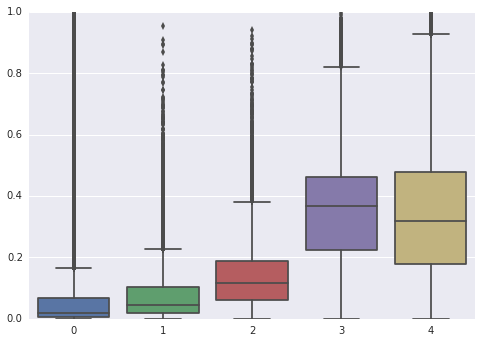

In [9]:
sns.boxplot(data=probs)

In [62]:
clf = LinearSVC()
param_dist = {"C": np.logspace(-10, 15, num=11, base=2)}
cd = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=10, n_jobs=4, cv=3, verbose=5)

In [63]:
from sklearn.grid_search import ParameterSampler
list(ParameterSampler(param_dist, 10))

[{'C': 32768.0},
 {'C': 181.01933598375618},
 {'C': 5792.6187514801977},
 {'C': 0.03125},
 {'C': 0.0009765625},
 {'C': 1.0},
 {'C': 1024.0},
 {'C': 5.6568542494923806},
 {'C': 0.0055242717280199029},
 {'C': 0.17677669529663689}]

In [ ]:
cd.fit(Xtr, ytr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [1]:
accuracy_score(cd.best_estimator_.predict(Xev), yev)

NameError: name 'accuracy_score' is not defined

In [ ]:
1+1